# Introduction

In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

data = load_iris()

In [24]:
df = pd.DataFrame(data['data'])

In [25]:
df.columns = data['feature_names']

In [26]:
df['target'] = data['target']

In [27]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [28]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [29]:
df.isna().any()

sepal length (cm)    False
sepal width (cm)     False
petal length (cm)    False
petal width (cm)     False
target               False
dtype: bool

In [30]:
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

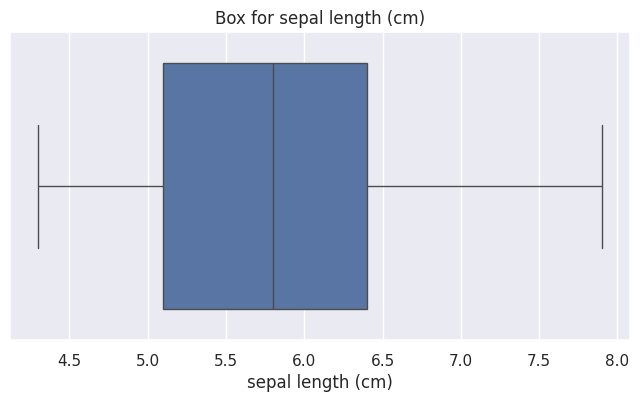

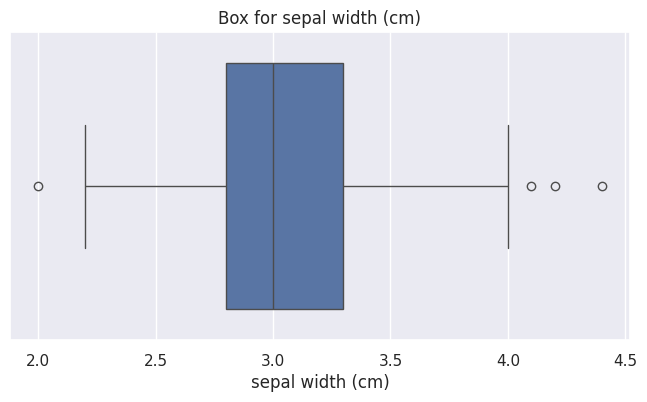

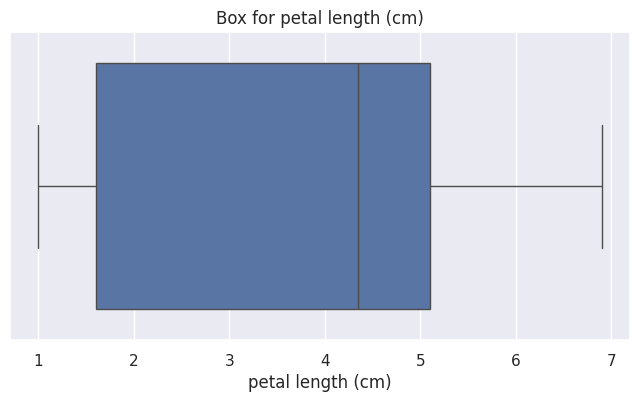

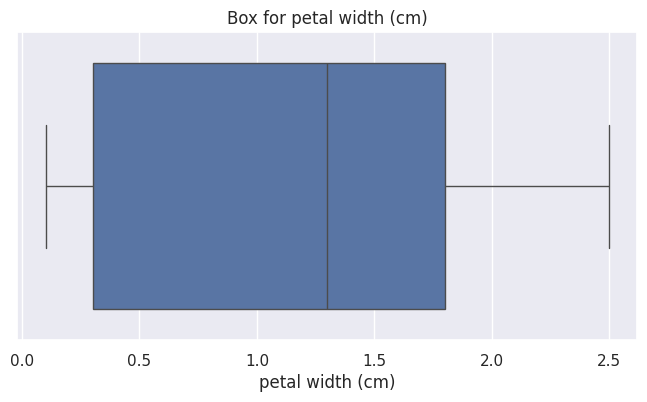

In [31]:
# Checking Outliers using box-plots

def check_outliers(df, column_name):
    plt.figure(figsize=(8, 4))
    sns.boxplot(x = df[column_name])
    plt.title(f"Box for {column_name}")
    plt.show()

for col in data['feature_names']:
    check_outliers(df, col)

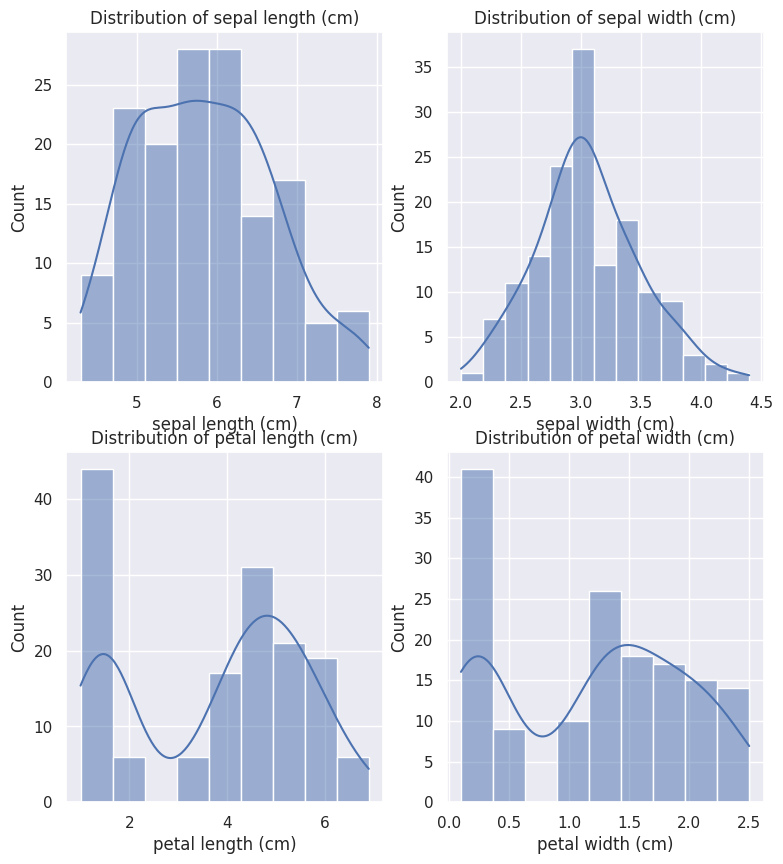

In [32]:
# Univariate Analysis

plt.figure(figsize = (9, 10))

sns.set_theme()

feature_columns = data['feature_names']

for i, feature in enumerate(feature_columns, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df[feature], kde = True)
    plt.title(f"Distribution of {feature}")

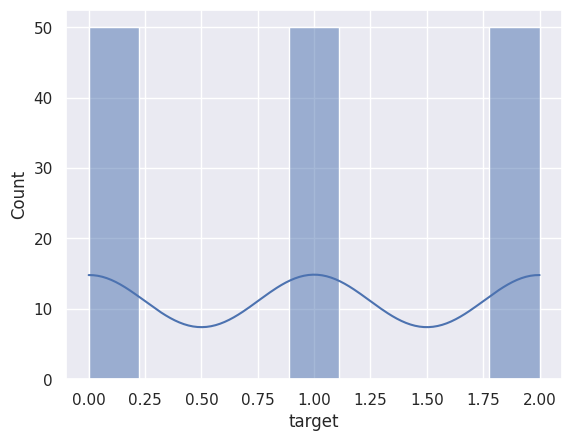

In [33]:

sns.histplot(df['target'], kde=True)
plt.show()

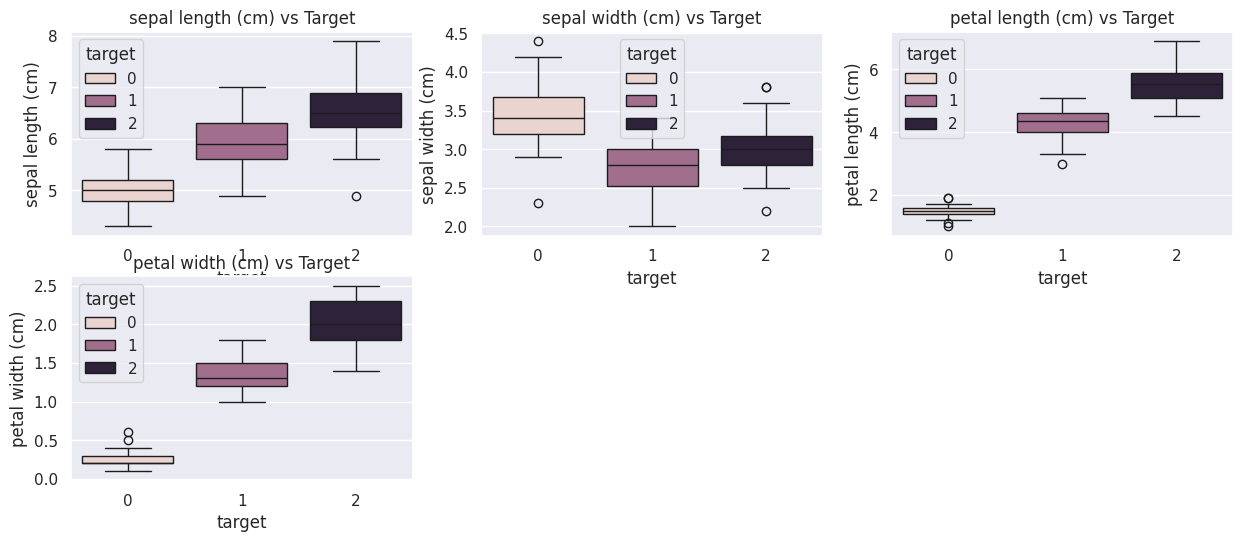

In [37]:
# Bivariate analysis
plt.figure(figsize = (15, 9))

for i, feature in enumerate(feature_columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(data = df, x = 'target', y = feature, hue = 'target')
    plt.title(f"{feature} vs Target")


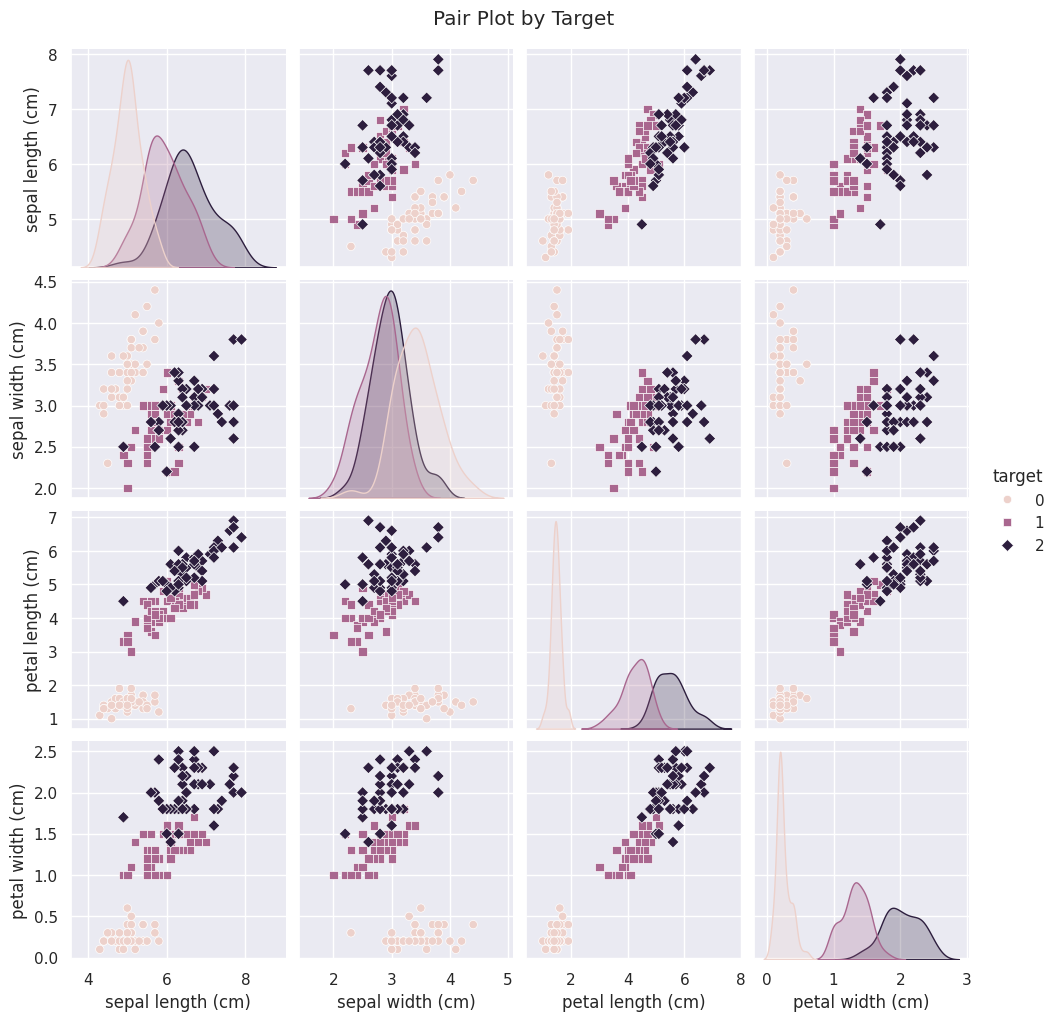

In [40]:
# Multivariate analysis

sns.pairplot(df, hue='target', markers = ['o', 's', 'D'], diag_kind = 'kde', height = 2.5)
plt.suptitle('Pair Plot by Target', y = 1.02)
plt.show()

In [41]:
# Correlation Matrix

corr_matrix = df.corr()
corr_matrix

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
sepal length (cm),1.000000,-0.117570,0.871754,0.817941,0.782561
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal length (cm),0.871754,-0.428440,1.000000,0.962865,0.949035
petal width (cm),0.817941,-0.366126,0.962865,1.000000,0.956547
target,0.782561,-0.426658,0.949035,0.956547,1.000000


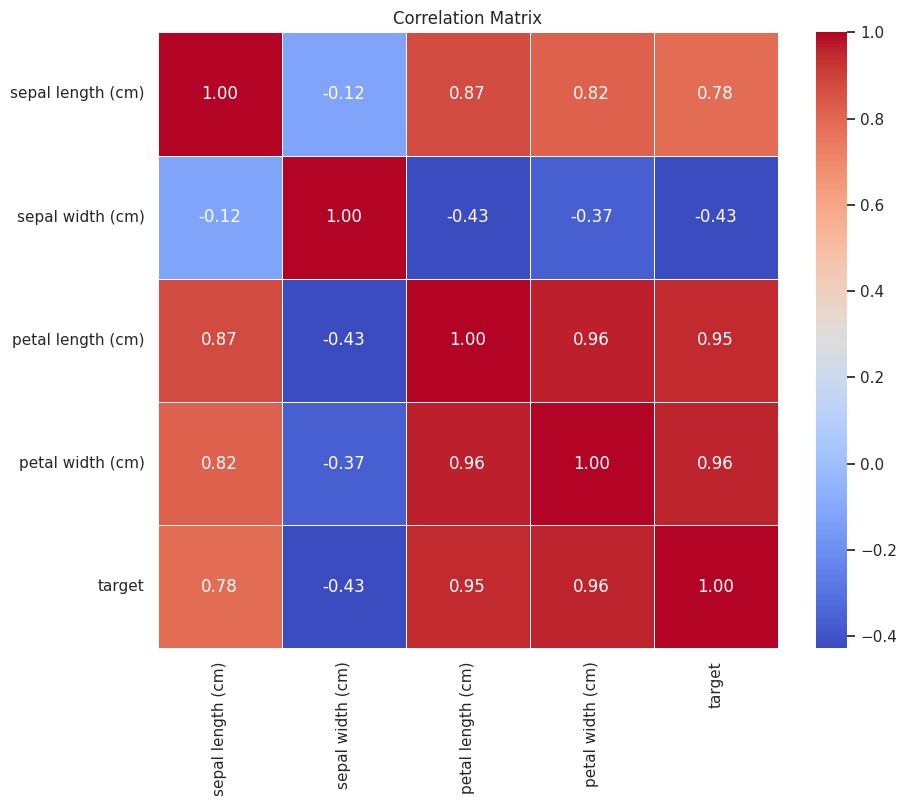

In [43]:
plt.figure(figsize = (10, 8))
sns.heatmap(corr_matrix, annot=True, cmap = 'coolwarm', fmt = '.2f', linewidths = 0.5)
plt.title('Correlation Matrix')
plt.show()

In [44]:
# Handling Outliers

for feature in data['feature_names']:
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df = df[(df[feature] >= lower_bound) & (df[feature] <= upper_bound)]

df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


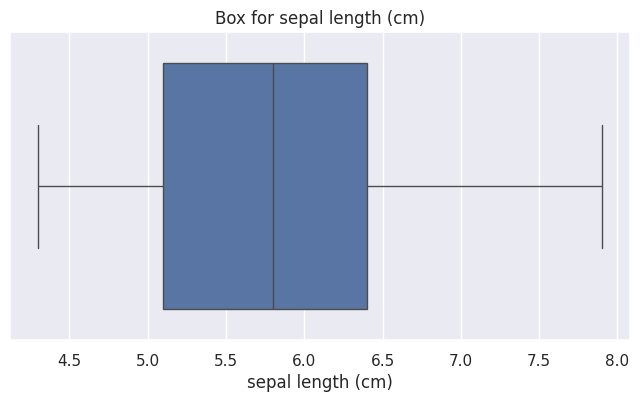

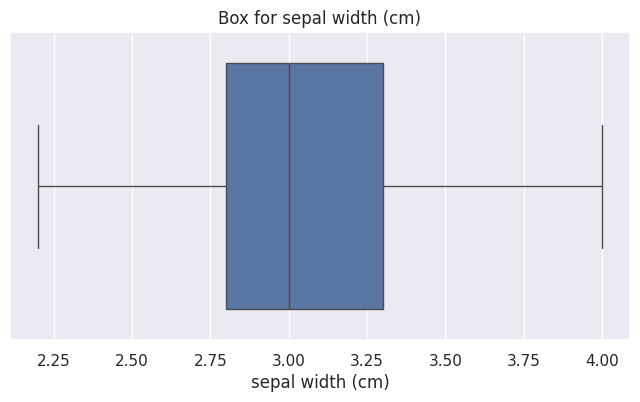

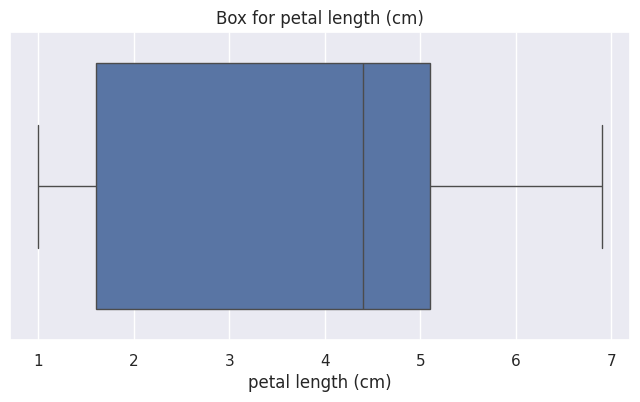

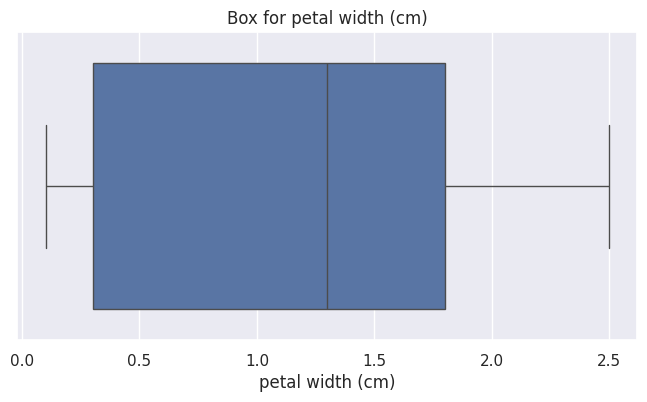

In [46]:
for feature in data['feature_names']:
    check_outliers(df, feature)

In [48]:
# Building Model

X = data['data']
y = data['target']

X_transformed = np.log(X)

In [50]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size = 0.2, random_state = 42)

In [51]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

# Logistic Regression
log_reg_params = {'C':[0.001, 0.01, 0.1, 1, 10, 100]}
log_reg = GridSearchCV(LogisticRegression(max_iter = 1000), log_reg_params, cv = 5)
log_reg.fit(X_train, y_train)


# Random Forest
rf_params = {'n_estimators':[50, 100, 200], 'max_depth': [None, 10, 20, 30], 'min_samples_split':[2, 5, 10], 'min_samples_leaf':[1, 2, 4]}
rf = GridSearchCV(RandomForestClassifier(), rf_params, cv = 5)
rf.fit(X_train, y_train)

# Support Vector Machine
svm_params = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
svm = GridSearchCV(SVC(probability=True), svm_params, cv=5)
svm.fit(X_train, y_train)

# K-Nearest Neighbors
knn_params = {'n_neighbors': [3, 5, 7, 10], 'weights': ['uniform', 'distance']}
knn = GridSearchCV(KNeighborsClassifier(), knn_params, cv=5)
knn.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7, 10],
                         'weights': ['uniform', 'distance']})

In [52]:
from sklearn.metrics import accuracy_score, classification_report

def evaluate(best_model, X_test, y_test):
    y_pred = best_model.predict(X_test)
    y_prob = best_model.predict_proba(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)

    print(f"Best Model: {best_model.best_estimator_}")
    print(f"Best Parameters: {best_model.best_params_}")
    print(f"Accuracy: {accuracy:.2f}")
    print("Classification Report:\n", class_report)
    print("\n")


evaluate(log_reg, X_test, y_test)
evaluate(rf, X_test, y_test)
evaluate(svm, X_test, y_test)
evaluate(knn, X_test, y_test)

Best Model: LogisticRegression(C=10, max_iter=1000)
Best Parameters: {'C': 10}
Accuracy: 1.00
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



Best Model: RandomForestClassifier(min_samples_split=10, n_estimators=50)
Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 50}
Accuracy: 1.00
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro 